https://www.youtube.com/watch?v=Zz1sgYxrA-k

## 動画まとめ

最小二乗法

データ:$(x_1, y_1), (x_2, y_2), ... , ( x_n, y_n)$

直線の式

$y=ax+b$

偏差を求める式

$\varepsilon(a, b) := \sum_i(y_i-ax_i-b)^2$…①

bについて固定すると、下に凸な二次関数が出来ると考えられる。

aについて固定すると、下に凸な二次関数が出来ると考えられる。

上記式の最小値を求めたいので、aの二次関数とbの二次関数の最小となる点をそれぞれ求めることを考える。

①をaについて偏微分した式

$$
\frac{\partial\varepsilon(a, b)}{{\partial}a} = -2\sum_i x_i(y_i-ax_i-b) = 0
$$

-2を消す→シグマを展開
$$
\sum_i x_i y_i - \sum_i ax_i^2 - \sum_i  x_i b = 0
$$

$$
a \sum_i x_i^2 + b \sum_i x_i = \sum_i x_i y_i \dotsm \text{②}
$$

①をbについて偏微分した式

$$
\frac{\partial\varepsilon(a, b)}{\partial b} = -2\sum_i(y_i-ax_i-b) = 0
$$

-2を消す→シグマを展開

$$
\sum_i y_i - \sum_i ax_i - \sum_i b = 0
$$

第3項はn個のbと考える

$$
a \sum_i x_i + bn = \sum_i y_i
$$

両辺を$n$で割る

$$
\frac{a \sum_i x_i}{n} + \frac{bn}{n} = \frac{\sum_i y_i}{n}
$$

ここで$\frac{\sum_i x_i}{n} = \overline{x},\frac{\sum_i y_i}{n} = \overline{y}$より

$$
a \overline{x} + b = \overline{y} \\
b = - a \overline{x} + \overline{y} \dotsm \text{③}
$$

再掲 ②

$$
a \sum_i x_i^2 + b \sum_i x_i = \sum_i x_i y_i \dotsm \text{②}
$$

③を②に代入

$$
a \sum_i x_i^2 + (-a\overline{x} + \overline{y}) \sum_i x_i = \sum_i x_i y_i
$$


展開

$$
a \sum_i x_i^2 -a \overline{x} \sum_i x_i + \overline{y} \sum_i x_i = \sum_i x_i y_i
$$

両辺をnで割る

$$
\frac{a \sum_i x_i^2}{n} - \frac{a \overline{x}\sum_i x_i}{n} + \frac{\overline{y} \sum_i x_i}{n} = \frac{\sum_i x_i y_i}{n}
$$

ここで$\overline{x} = \frac{\sum_i x_i}{n}$より

$$
a \overline{x^2} - a \overline{x}^2 + \overline{x}\ \overline{y} = \overline{x y}
$$

aについて展開

$$
a = \frac{\overline{xy} - \overline{x}\ \overline{y}}{\overline{x^2} - \overline{x}^2}
$$

ここで、$\overline{xy} - \overline{x}\ \overline{y}$は$x, y$の共分散$\sigma_{ab}$

また、$\overline{x^2}-\overline{x}^2$はxの分散$\sigma_x^2$

$$
\therefore a = \frac{\sigma_{ab}}{\sigma_x^2}
$$

まとめ

$$
b = - a \overline{x} + \overline{y} \\
a = \frac{\sigma_{ab}}{\sigma_x^2}
$$


## コード

In [8]:
# sklearnでデータを生成
from sklearn.datasets import make_regression
raw_data = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise = 28, bias=0.4)
raw_data[0].shape, raw_data[1].shape

((100, 1), (100,))

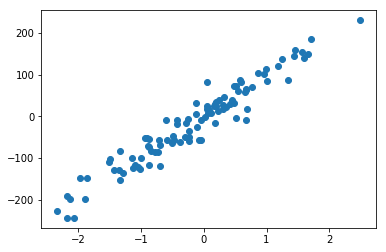

In [10]:
# グラフ表示
import matplotlib.pyplot as plt
plt.scatter(x=raw_data[0], y=raw_data[1])
plt.show()

求めたい式$y = ax + b$


$$
a = \frac{\overline{xy} - \overline{x}\ \overline{y}}{\overline{x^2} - \overline{x}^2} \\
b = - a \overline{x} + \overline{y}
$$


In [33]:
X, Y = raw_data[0].reshape(-1).tolist(), raw_data[1].reshape(-1).tolist()

In [34]:
import numpy as np
def func_a(X, Y):
    n = len(X)
    bar_xy = np.mean([x*y for x,y in zip(X, Y)])
    barx_bary = np.mean(X) * np.mean(Y)
    x_2_bar = np.mean([x**2 for x in X])
    x_bar_2 = np.mean(X)**2
    return (bar_xy - barx_bary) / (x_2_bar - x_bar_2)

func_a(x, y)

94.79223068837882

In [35]:
def func_b(X, Y):
    a = func_a(X, Y)
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
    return -a * x_bar + y_bar
func_b(X, Y)

-0.0009501386615227148

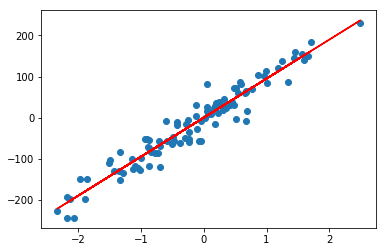

In [40]:
a = func_a(X, Y)
b = func_b(X, Y)

func_ax_plus_b = lambda x, y : a * x + b
Y_line = [func_ax_plus_b(x, y) for x, y in zip(X, Y)]

plt.scatter(X, Y)
plt.plot(X, Y_line, c="r")
plt.show()